In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv('iris.csv')

In [5]:
data.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


In [7]:
data=data.rename(columns={'Sepal.Length':'sepal_length','Sepal.Width':'sepal_width',
                         'Petal.Length':'petal_length','Petal.Width':'petal_width','Species':'target'})

In [8]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.target=enc.fit_transform(data.target)


In [10]:
x=data.iloc[:,1:5]

In [11]:
x.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [12]:
y=data.target

In [13]:
y.head(2)

0    0
1    0
Name: target, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [15]:
model=RandomForestClassifier(random_state=10,n_estimators=100)

In [16]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [17]:
y_pred=model.predict(x_test)

In [18]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [19]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
target,,,
0,14,0,0
1,0,16,1
2,0,0,14


In [20]:
pca=PCA()
x=pd.DataFrame(pca.fit_transform(x))

In [22]:
x.head(2)

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027


In [23]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [24]:
pca.explained_variance_ratio_[0:2].sum()

0.977685206318795

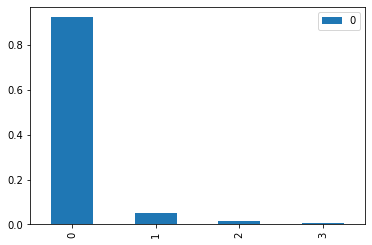

In [25]:
iris_var=pd.DataFrame(pca.explained_variance_ratio_)
iris_var.plot(kind='bar')

In [26]:
x


,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [27]:
x=x.iloc[:,:2]

In [30]:
x.head(2)

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [31]:
model=RandomForestClassifier(random_state=10,n_estimators=100)

In [33]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [34]:
y_pred=model.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

1.0